In [ ]:
-1 没有判断出来，0湖泊，1绿地，2大学，3工厂，4住宅，5公共服务，6商业区

In [1]:
import pandas as pd
df=pd.read_csv('BertGridJoin0105.csv')
df.head()

,CATEGORY,IDS,NUMS,SUBTYPE,OBJECTID,Label,lng,lat,Topic,Doc_ID,BertIds,labels
0,政府及社会团体相关 政府机关相关 生活服务场所 乡镇以下级政府及事业单位 乡镇以下级政府及事...,0,11,政府及社会团体相关 政府机关 生活服务场所 政府机关 政府机关 政府机关 临街院门 物流速递...,1,28,114.291718,30.462484,5,0,0,5
1,物流速递 政府及社会团体相关,1,2,物流速递 政府及社会团体相关,2,29,114.296722,30.462484,-1,1,1,-1
2,其它农林牧渔基地 物流速递 汽车维修 公司 餐饮相关 餐饮相关 中餐厅 快餐厅 公交车站相关...,2,27,农林牧渔基地 物流速递 汽车维修 公司 餐饮相关场所 餐饮相关场所 中餐厅 快餐厅 公交车站...,3,30,114.301720,30.462484,-1,2,2,-1
3,路口名 餐饮相关 公证鉴定机构 公司 小学,3,5,交通地名 餐饮相关场所 公检法机构 公司 学校,4,31,114.306725,30.462484,-1,3,3,-1
4,餐饮相关,4,1,餐饮相关场所,5,32,114.311722,30.462484,6,4,4,6


In [2]:
df.shape

(1976, 12)

In [3]:
tf=df[df['Topic']!=-1]
tf.shape
tf[tf['Topic']!=0].shape

(970, 12)

In [7]:
#构造语料
sentences=[]
for i in df['SUBTYPE'].values.tolist():
    try:
        sentences.append(i.split(' '))
    except:
        sentences.append([''])

In [10]:
#Word2ve 
# -*- coding: utf-8 -*-
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
# 训练的语料
# 利用语料训练模型
model = Word2Vec(sentences,window=5, min_count=1)

# 基于2d PCA拟合数据
X = model[model.wv.vocab]

<ipython-input-10-ab396283c9ad>:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = model[model.wv.vocab]


In [23]:
import numpy as np
sentence_vec=[]
for i in sentences:
    tmp=np.zeros(shape=(100,))
    for j in i:
        tmp=tmp+model[j]
    sentence_vec.append(tmp/len(i))

<ipython-input-23-31e6a9a7075c>:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  tmp=tmp+model[j]


In [33]:
from sklearn.cluster import KMeans

y_pred = KMeans(n_clusters=8, random_state=9).fit_predict(sentence_vec)
df['Word2vec']=np.array(y_pred)

In [43]:
#构造语料
juzi=[]
for i in df.fillna('')['SUBTYPE'].values.tolist():
        if i==None or i==np.nan:
            juzi.append('')
        else:
            juzi.append(i)

In [44]:
#TFIDF
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
vectorizer = CountVectorizer()
count = vectorizer.fit_transform(juzi)

In [50]:
#print(vectorizer.get_feature_names())  #['一汽解放销售', '三菱特约维修',
#print(vectorizer.vocabulary_)#{'政府及社会团体相关': 108, '政府机关': 109,
#print(count.toarray())
transformer = TfidfTransformer()
tfidf_matrix = transformer.fit_transform(count)
# print(tfidf_matrix.toarray())
y_pred = KMeans(n_clusters=8, random_state=9).fit_predict(tfidf_matrix.toarray())
df['TFIDF']=np.array(y_pred)

In [65]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=8,max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
docres = lda.fit_transform(tfidf_matrix)

217

In [74]:
y_pred=[]
for i in docres:
    y_pred.append(np.argmax(i))
df['TF_LDA']=np.array(y_pred)

In [77]:
#LDA不加TFIDF优化
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=8,max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
docres = lda.fit_transform(count)

In [78]:
y_pred=[]
for i in docres:
    y_pred.append(np.argmax(i))
df['LDA']=np.array(y_pred)

In [79]:
#构造标注数据
df.head()

,CATEGORY,IDS,NUMS,SUBTYPE,OBJECTID,Label,lng,lat,Topic,Doc_ID,BertIds,labels,Word2vec,TFIDF,TF_LDA,LDA
0,政府及社会团体相关 政府机关相关 生活服务场所 乡镇以下级政府及事业单位 乡镇以下级政府及事...,0,11,政府及社会团体相关 政府机关 生活服务场所 政府机关 政府机关 政府机关 临街院门 物流速递...,1,28,114.291718,30.462484,5,0,0,5,7,7,4,7
1,物流速递 政府及社会团体相关,1,2,物流速递 政府及社会团体相关,2,29,114.296722,30.462484,-1,1,1,-1,5,1,1,1
2,其它农林牧渔基地 物流速递 汽车维修 公司 餐饮相关 餐饮相关 中餐厅 快餐厅 公交车站相关...,2,27,农林牧渔基地 物流速递 汽车维修 公司 餐饮相关场所 餐饮相关场所 中餐厅 快餐厅 公交车站...,3,30,114.301720,30.462484,-1,2,2,-1,0,5,4,4
3,路口名 餐饮相关 公证鉴定机构 公司 小学,3,5,交通地名 餐饮相关场所 公检法机构 公司 学校,4,31,114.306725,30.462484,-1,3,3,-1,7,1,1,2
4,餐饮相关,4,1,餐饮相关场所,5,32,114.311722,30.462484,6,4,4,6,0,1,4,6


In [88]:
def wgs84tobd09(lng, lat):
    tmp=wgs84togcj02(lng, lat)
    res=gcj02tobd09(tmp[0],tmp[1])
    return str(res[0])+','+str(res[1])

In [89]:
wgs84tobd09(114.291718,30.462484)

'114.30370853954126,30.46566721248256'

In [90]:
df['baidu']=df.apply(lambda x:wgs84tobd09(x['lng'],x['lat']),axis=1)

In [94]:
df.to_csv('Semantic_Comparison.csv',index=None,encoding='utf_8_sig')

In [ ]:
114.3517227,30.6924858


In [ ]:
import numpy as np
from keras.models import load_model
from sklearn.utils import shuffle
 
import keras.backend as K
from keras import Sequential
from keras.layers import Dense
import numpy as np
 
def getPrecision(y_true, y_pred):
    TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))#TP
    N = (-1)*K.sum(K.round(K.clip(y_true-K.ones_like(y_true), -1, 0)))#N
    TN=K.sum(K.round(K.clip((y_true-K.ones_like(y_true))*(y_pred-K.ones_like(y_pred)), 0, 1)))#TN
    FP=N-TN
    precision = TP / (TP + FP + K.epsilon())#TT/P
    return precision
 
def getRecall(y_true, y_pred):
    TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))#TP
    P=K.sum(K.round(K.clip(y_true, 0, 1)))
    FN = P-TP #FN=P-TP
    recall = TP / (TP + FN + K.epsilon())#TP/(TP+FN)
    return recall
 
#加载模型h5文件
# model = load_model("new.h5")
model = load_model("new.h5", custom_objects={'getPrecision': getPrecision,'getRecall':getRecall})  # 假设自定义的层的名字为AttLayer
 
model.summary()
print(model.summary())
 
a = np.load(r"C:\Users\20143\data.npy")
# print(model.predict(a[0]))
 
b = np.load(r"C:\Users\20143\data_label.npy")
a = np.load(r"C:\Users\20143\data.npy")
X, Y = shuffle(a, b)
 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
 
# x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.1)
x_test=X
y_test=Y
# print(y_test)
# print('---')
# print(x_test)
 
# conf_mat = confusion_matrix(y_test, y_pred)
# fig, ax = plt.subplots(figsize=(8,6))
# sns.heatmap(conf_mat, annot=True, fmt='d',
#             xticklabels=category_id_df.Product.values, yticklabels=category_id_df.Product.values)
# plt.ylabel('Actual')
# plt.xlabel('Predicted')
# plt.show()
 
from sklearn.metrics import confusion_matrix
 
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import itertools
 
 
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens,  # 这个地方设置混淆矩阵的颜色主题，这个主题看着就干净~
                          normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
 
    if cmap is None:
        cmap = plt.get_cmap('Blues')
 
    plt.figure(figsize=(15, 12))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
 
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
 
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    # 这里这个savefig是保存图片，如果想把图存在什么地方就改一下下面的路径，然后dpi设一下分辨率即可。
    # plt.savefig('/content/drive/My Drive/Colab Notebooks/confusionmatrix32.png',dpi=350)
    plt.show()
 
 
# 显示混淆矩阵
def plot_confuse(model, x_val, y_val):
    predictions = model.predict_classes(x_val, batch_size=16)
    truelabel = y_val.argmax(axis=-1)  # 将one-hot转化为label
    conf_mat = confusion_matrix(y_true=truelabel, y_pred=predictions)
    print(conf_mat)
    plt.figure()
    plot_confusion_matrix(conf_mat, normalize=False, target_names=labels, title='Confusion Matrix')
 
 
# =========================================================================================
# 最后调用这个函数即可。 test_x是测试数据，test_y是测试标签（这里用的是One——hot向量）
# labels是一个列表，存储了你的各个类别的名字，最后会显示在横纵轴上。
# 比如这里我的labels列表
labels = ['Estate','Tourist','Business','Medical','Railway','Road&Transport','Education','Catering','Shopping']
from keras.utils import to_categorical
y_test = to_categorical(y_test)
x_test= x_test.reshape((4313, 100, 1000, 1))
plot_confuse(model, x_test, y_test)

In [ ]:
#绘制混淆矩阵
from sklearn.metrics import confusion_matrix
y_true = ["dog", "dog", "dog", "cat", "cat", "cat", "cat"]
y_pred = ["cat", "cat", "dog", "cat", "cat", "cat", "cat"]
C2 = confusion_matrix(y_actual, y_predict, labels=["dog","cat"])
tn, fp, fn, tp =C2.ravel()
print(C2)
print(C2.ravel())

In [ ]:
#计算准确率
from keras.models import load_model
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score,accuracy_score
 
 
# 测试
# model=load_model('./models/lenet5_weight.h5')
 
y_predict = model.predict(test_images, batch_size=512, verbose=1)
# y_predict = (y_predict > 0.007).astype(int)
y_predict = (y_predict > 0.01).astype(int)
y_true = np.reshape(test_labels, [-1])
y_pred = np.reshape(y_predict, [-1])
 
# 评价指标
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred, average='binary')
f1score = f1_score(y_true, y_pred, average='binary')
 
# Micro F1: 将n分类的评价拆成n个二分类的评价，将n个二分类评价的TP、FP、RN对应相加，计算评价准确率和召回率，由这2个准确率和召回率计算的F1 score即为Micro F1。
# Macro F1: 将n分类的评价拆成n个二分类的评价，计算每个二分类的F1 score，n个F1 score的平均值即为Macro F1。
# 一般来讲，Macro F1、Micro F1高的分类效果好。Macro F1受样本数量少的类别影响大。
micro_f1 = f1_score(y_true, y_pred,average='micro')
macro_f1 = f1_score(y_true, y_pred,average='macro')
 
 
print('accuracy:',accuracy)
print('precision:',precision)
print('recall:',recall)
print('f1score:',f1score)
print('Macro-F1: {}'.format(macro_f1))
print('Micro-F1: {}'.format(micro_f1))

No handles with labels found to put in legend.
G:\ProgramData\Anaconda2020\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
G:\ProgramData\Anaconda2020\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


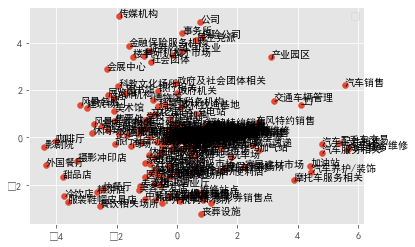

In [28]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
# 在我的 notebook 里，要设置下面两行才能显示中文
plt.rcParams['font.family'] = ['sans-serif']
# 如果是在 PyCharm 里，只要下面一行，上面的一行可以删除
plt.rcParams['font.sans-serif'] = ['SimHei']

pca = PCA(n_components=2)
result = pca.fit_transform(X)
# 可视化展示
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.legend()
pyplot.show()

In [ ]:
from keras.models import load_model
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score,accuracy_score
 
 
# 测试
# model=load_model('./models/lenet5_weight.h5')
 
y_predict = model.predict(test_images, batch_size=512, verbose=1)
# y_predict = (y_predict > 0.007).astype(int)
y_predict = (y_predict > 0.01).astype(int)
y_true = np.reshape(test_labels, [-1])
y_pred = np.reshape(y_predict, [-1])
 
# 评价指标
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred, average='binary')
f1score = f1_score(y_true, y_pred, average='binary')
 
# Micro F1: 将n分类的评价拆成n个二分类的评价，将n个二分类评价的TP、FP、RN对应相加，计算评价准确率和召回率，由这2个准确率和召回率计算的F1 score即为Micro F1。
# Macro F1: 将n分类的评价拆成n个二分类的评价，计算每个二分类的F1 score，n个F1 score的平均值即为Macro F1。
# 一般来讲，Macro F1、Micro F1高的分类效果好。Macro F1受样本数量少的类别影响大。
micro_f1 = f1_score(y_true, y_pred,average='micro')
macro_f1 = f1_score(y_true, y_pred,average='macro')
 
 
print('accuracy:',accuracy)
print('precision:',precision)
print('recall:',recall)
print('f1score:',f1score)
print('Macro-F1: {}'.format(macro_f1))
print('Micro-F1: {}'.format(micro_f1))


<Figure size 720x576 with 0 Axes>

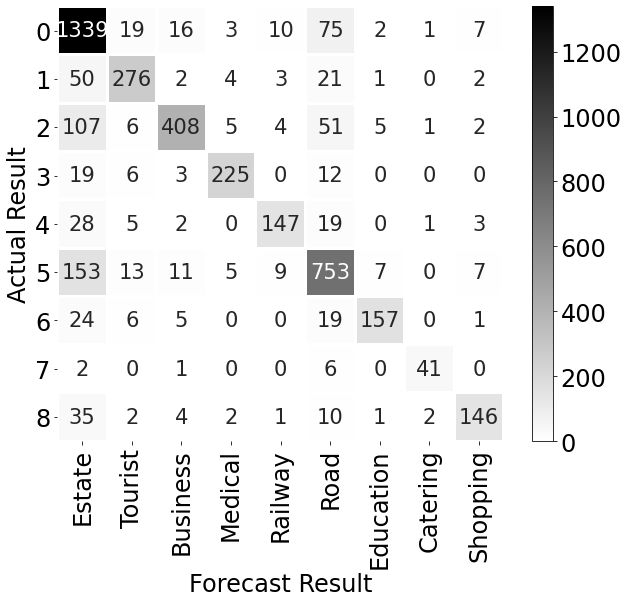

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#绘制混淆矩阵
conmatrix=np.array([[1339,19,16,3,10,75,2,1,7],
 [50,276,2,4,3,21,1,0,2],
 [107,6,408,5,4,51,5,1,2],
 [19,6,3,225,0,12,0,0,0],
 [28,5,2,0,147,19,0,1,3],
 [153,13,11,5,9,753,7,0,7],
 [24,6,5,0,0,19,157,0,1],
 [2,0,1,0,0,6,0,41,0],
 [35,2,4,2,1,10,1,2,146]])
df_cm=pd.DataFrame(conmatrix,
                  columns=['Estate','Tourist','Business','Medical','Railway','Road','Education','Catering','Shopping'])#&Transport
 
plt.figure(figsize=(10,8))
f, ax= plt.subplots(figsize = (10, 8))
 
h=sns.heatmap(df_cm,annot=True,cmap="binary",fmt='.20g',ax=ax,linewidths=2,
            annot_kws={'size':21},cbar=False)
 
#h=sns.heatmap(data, annot=True,fmt='d',linewidths=0.5,cbar=False) #设置不使用其默认自带的colorbar
cb=h.figure.colorbar(h.collections[0]) #显示colorbar
cb.ax.tick_params(labelsize=24) #设置colorbar刻度字体大小。
 
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
 
ax.tick_params(labelsize=24)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
 
plt.ylabel('Actual Result',fontsize=24)
plt.xlabel('Forecast Result',fontsize=24)
plt.savefig('Comaparison.svg',format='svg')
plt.show()

In [2]:
def kappa(matrix):
    n = np.sum(matrix)
    sum_po = 0
    sum_pe = 0
    for i in range(len(matrix[0])):
        sum_po += matrix[i][i]
        row = np.sum(matrix[i, :])
        col = np.sum(matrix[:, i])
        sum_pe += row * col
    po = sum_po / n
    pe = sum_pe / (n * n)
    # print(po, pe)
    return (po - pe) / (1 - pe)

In [3]:
kappa(conmatrix)

0.7563168172545249

In [4]:
conmatrix.sum()

4313

In [81]:

# -*- coding: UTF-8 -*-
__author__ = 'zy'
__time__ = '2020/7/25 23:08'
import requests
import math

key = '8VUjfqGwgnHwEZLxwPpnZvO1Sgeq2HFO'  # 这里填写你的百度开放平台的key
x_pi = 3.14159265358979324 * 3000.0 / 180.0
pi = 3.1415926535897932384626  # π
a = 6378245.0  # 长半轴
ee = 0.00669342162296594323  # 扁率


def geocode(address):
    """
    利用百度geocoding服务解析地址获取位置坐标
    :param address:需要解析的地址
    :return:
    """
    geocoding = {'s': 'rsv3',
                 'key': key,
                 'city': '全国',
                 'address': address}
    res = requests.get(
        "http://restapi.amap.com/v3/geocode/geo", params=geocoding)
    if res.status_code == 200:
        json = res.json()
        status = json.get('status')
        count = json.get('count')
        if status == '1' and int(count) >= 1:
            geocodes = json.get('geocodes')[0]
            lng = float(geocodes.get('location').split(',')[0])
            lat = float(geocodes.get('location').split(',')[1])
            return [lng, lat]
        else:
            return None
    else:
        return None


def gcj02tobd09(lng, lat):
    """
    火星坐标系(GCJ-02)转百度坐标系(BD-09)
    谷歌、高德——>百度
    :param lng:火星坐标经度
    :param lat:火星坐标纬度
    :return:
    """
    z = math.sqrt(lng * lng + lat * lat) + 0.00002 * math.sin(lat * x_pi)
    theta = math.atan2(lat, lng) + 0.000003 * math.cos(lng * x_pi)
    bd_lng = z * math.cos(theta) + 0.0065
    bd_lat = z * math.sin(theta) + 0.006
    return [bd_lng, bd_lat]


def bd09togcj02(bd_lon, bd_lat):
    """
    百度坐标系(BD-09)转火星坐标系(GCJ-02)
    百度——>谷歌、高德
    :param bd_lat:百度坐标纬度
    :param bd_lon:百度坐标经度
    :return:转换后的坐标列表形式
    """
    x = bd_lon - 0.0065
    y = bd_lat - 0.006
    z = math.sqrt(x * x + y * y) - 0.00002 * math.sin(y * x_pi)
    theta = math.atan2(y, x) - 0.000003 * math.cos(x * x_pi)
    gg_lng = z * math.cos(theta)
    gg_lat = z * math.sin(theta)
    return [gg_lng, gg_lat]


def wgs84togcj02(lng, lat):
    """
    WGS84转GCJ02(火星坐标系)
    :param lng:WGS84坐标系的经度
    :param lat:WGS84坐标系的纬度
    :return:
    """
    if out_of_china(lng, lat):  # 判断是否在国内
        return lng, lat
    dlat = transformlat(lng - 105.0, lat - 35.0)
    dlng = transformlng(lng - 105.0, lat - 35.0)
    radlat = lat / 180.0 * pi
    magic = math.sin(radlat)
    magic = 1 - ee * magic * magic
    sqrtmagic = math.sqrt(magic)
    dlat = (dlat * 180.0) / ((a * (1 - ee)) / (magic * sqrtmagic) * pi)
    dlng = (dlng * 180.0) / (a / sqrtmagic * math.cos(radlat) * pi)
    mglat = lat + dlat
    mglng = lng + dlng
    return [mglng, mglat]


def gcj02towgs84(lng, lat):
    """
    GCJ02(火星坐标系)转GPS84
    :param lng:火星坐标系的经度
    :param lat:火星坐标系纬度
    :return:
    """
    if out_of_china(lng, lat):
        return lng, lat
    dlat = transformlat(lng - 105.0, lat - 35.0)
    dlng = transformlng(lng - 105.0, lat - 35.0)
    radlat = lat / 180.0 * pi
    magic = math.sin(radlat)
    magic = 1 - ee * magic * magic
    sqrtmagic = math.sqrt(magic)
    dlat = (dlat * 180.0) / ((a * (1 - ee)) / (magic * sqrtmagic) * pi)
    dlng = (dlng * 180.0) / (a / sqrtmagic * math.cos(radlat) * pi)
    mglat = lat + dlat
    mglng = lng + dlng
    return [lng * 2 - mglng, lat * 2 - mglat]


def transformlat(lng, lat):
    ret = -100.0 + 2.0 * lng + 3.0 * lat + 0.2 * lat * lat + \
          0.1 * lng * lat + 0.2 * math.sqrt(math.fabs(lng))
    ret += (20.0 * math.sin(6.0 * lng * pi) + 20.0 *
            math.sin(2.0 * lng * pi)) * 2.0 / 3.0
    ret += (20.0 * math.sin(lat * pi) + 40.0 *
            math.sin(lat / 3.0 * pi)) * 2.0 / 3.0
    ret += (160.0 * math.sin(lat / 12.0 * pi) + 320 *
            math.sin(lat * pi / 30.0)) * 2.0 / 3.0
    return ret


def transformlng(lng, lat):
    ret = 300.0 + lng + 2.0 * lat + 0.1 * lng * lng + \
          0.1 * lng * lat + 0.1 * math.sqrt(math.fabs(lng))
    ret += (20.0 * math.sin(6.0 * lng * pi) + 20.0 *
            math.sin(2.0 * lng * pi)) * 2.0 / 3.0
    ret += (20.0 * math.sin(lng * pi) + 40.0 *
            math.sin(lng / 3.0 * pi)) * 2.0 / 3.0
    ret += (150.0 * math.sin(lng / 12.0 * pi) + 300.0 *
            math.sin(lng / 30.0 * pi)) * 2.0 / 3.0
    return ret


def out_of_china(lng, lat):
    """
    判断是否在国内，不在国内不做偏移
    :param lng:
    :param lat:
    :return:
    """
    if lng < 72.004 or lng > 137.8347:
        return True
    if lat < 0.8293 or lat > 55.8271:
        return True
    return False

def bd09towgs84(lng,lat):#114.277591,30.580842
    result2 = bd09togcj02(lng,lat)
    result4 = gcj02towgs84(result2[0], result2[1])
    return result4

import json,time
import pandas as pd
from urllib.request import urlopen, quote

def getlnglat(address):
    # http://api.map.baidu.com/geocoder/v2/?address=北京市海淀区上地十街10号&output=json&ak=您的ak&callback=showLocation //GET请求
    url = 'http://api.map.baidu.com/geocoder/v2/'
    output = 'json'
    ak = '8399wyuCP00HcW0c7rHfjMpCIT6dA4mC'  # 浏览器端密钥
    address = quote(address)  # 由于本文地址变量为中文，为防止乱码，先用quote进行编码
    uri = url + '?' + 'address=' + address + '&output=' + output + '&ak=' + ak
    print(uri)
    req = urlopen(uri)
    res = req.read().decode()
    temp = json.loads(res)
    lat = temp['result']['location']['lat']
    lng = temp['result']['location']['lng']

    code = temp['status']
    # print(lat, lng,code,)
    return lat, lng

def get_wgs(area):
    # latlng = ('武汉·汉口火车站 ')
    geocode = getlnglat(area)
    # geocode =(39.93410210068737, 116.14756198146019)
    return bd09towgs84(geocode[1],geocode[0])
    #[116.13488415043483, 39.926555169915595]
